**<center style="font-size: 22px">UNIVERSIDADE DE FORTALEZA</center>**
<center style="font-size: 18px">MBA Ciência de Dados</center>

***
<center>Nome: DiegoTeixeira Marques</center>
<center>E-mail: diegoteixeira1996@gmail.com</center>
<center>Matrícula: 1924526</center>

**<h3>1. Introdução</h3>**
<p>Com o objetivo de praticar o que foi visto em sala, este trabalho visa desenvolver um modelo de Machine Learning capaz de fazer previsões. Os dados utilizados são de jogadores da NBA, cujas informações contidas são referentes a seus rendimentos em quadra.
Assim, o desafio é chegar num modelo capaz de prever os salários dos jogadores, verificando também, se seu ganho é justo em relação aos demais.</p>

**<h3>2. Metodologia</h3>**
<p>Os primeiros passos, após a importação dos módulos e carga dos dados, será analisar todo o DataFrame e fazer uma higienização nos valores que não têm significância para as análises. Será verificado, os dados nulos, valores em branco e/ou zerados, os tipos de dados e se há informações repetidas</p>

<p>Em seguida, será analisada as correlações existentes do "SALARIO" (variável alvo) com os demais atributos através de gráficos e números aprasentados a partir do módulo SEABORN e da fórmula de PEARSON. </p>

<p>Por fim, será criado um modelo de Regressão Linear com os atribudos de maior correlação. Os testes e validações também ocorrerão, assim como os ajustes em prol de um modelo mais apropriado para previsões.</p>

In [271]:
# Importando os módulos necessários

import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [272]:
# Carregando o DATAFRAME

df_nba = pd.read_csv('NBA_Players.csv')

**<h3>3. Higienização do DataFrame</h3>**

**<h4>3.1 Conhecendo os dados</h4>**

<p>Os comandos a seguir permitem ter uma análise geral dos dados e identificar pontos que venham dificultar a continuidade do desenvolvimento do modelo.</p>

In [273]:
# Visualizando os dados

df_nba.head(5)

,TEAM,NAME,EXPERIENCE,URL,POSITION,AGE,HT,WT,COLLEGE,SALARY,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
0,Boston Celtics,Aron Baynes,6,http://www.espn.com/nba/player/_/id/2968439,SF,31,208.28,117.65,Washington State,"5,193,600",...,0.502,0.0-0.1,0.143,1.0-1.3,0.802,0.7,0.5,0.2,0.8,5.4
1,Boston Celtics,Justin Bibbs,0,http://www.espn.com/nba/player/_/id/3147500,G,22,195.58,99.55,Virginia Tech,Not signed,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
2,Boston Celtics,Jabari Bird,1,http://www.espn.com/nba/player/_/id/3064308,SG,24,198.12,89.59,California,"1,349,464",...,0.577,0.2-0.5,0.429,0.5-1.0,0.462,0.6,0.1,0.2,0.6,3.0
3,Boston Celtics,Jaylen Brown,2,http://www.espn.com/nba/player/_/id/3917376,F,21,200.66,99.55,California,"5,169,960",...,0.461,1.1-3.0,0.379,1.6-2.4,0.658,1.2,0.3,0.7,1.3,10.4
4,Boston Celtics,PJ Dozier,1,http://www.espn.com/nba/player/_/id/3923250,PG,21,198.12,92.76,South Carolina,Not signed,...,0.500,0.0-0.0,0.000,0.0-0.0,0.000,0.0,0.0,0.0,0.5,1.0


In [274]:
# Verificando quantidade de Linhas e Colunas

df_nba.shape

(550, 30)

In [275]:
# Visualizando as colunas
# Verifica-se um espaço desnecessário no nome da coluna

df_nba.columns

Index(['TEAM', ' NAME', ' EXPERIENCE', ' URL', ' POSITION', ' AGE', ' HT',
       ' WT', ' COLLEGE', ' SALARY', ' PPG_LAST_SEASON', ' APG_LAST_SEASON',
       ' RPG_LAST_SEASON', ' PER_LAST_SEASON', ' PPG_CAREER', ' APG_CAREER',
       ' RGP_CAREER', ' GP', ' MPG', ' FGM_FGA', ' FGP', ' THM_THA', ' THP',
       ' FTM_FTA', ' FTP', ' APG', ' BLKPG', ' STLPG', ' TOPG', ' PPG'],
      dtype='object')

In [276]:
# Verificando os tipos dos dados
# Algumas colunas estão como object, embora apresente dados que normalmente são números, como AGE por exemplo
# Verificaremos cada dado dentro destas colunas para saber qual deles foge do contexto numérico

df_nba.dtypes

TEAM                 object
 NAME                object
 EXPERIENCE           int64
 URL                 object
 POSITION            object
 AGE                 object
 HT                 float64
 WT                 float64
 COLLEGE             object
 SALARY              object
 PPG_LAST_SEASON    float64
 APG_LAST_SEASON    float64
 RPG_LAST_SEASON    float64
 PER_LAST_SEASON    float64
 PPG_CAREER         float64
 APG_CAREER         float64
 RGP_CAREER         float64
 GP                   int64
 MPG                float64
 FGM_FGA             object
 FGP                float64
 THM_THA             object
 THP                float64
 FTM_FTA             object
 FTP                float64
 APG                float64
 BLKPG              float64
 STLPG              float64
 TOPG               float64
 PPG                float64
dtype: object

In [277]:
# Identificando onde há valores nulos
# Observa-se 12 linhas com valores nulos. Serão analisadas e possivelmente excluídas do modelo

df_nba.isnull().sum()

TEAM                 0
 NAME                0
 EXPERIENCE          0
 URL                 0
 POSITION            0
 AGE                 0
 HT                  0
 WT                  0
 COLLEGE             0
 SALARY              0
 PPG_LAST_SEASON    12
 APG_LAST_SEASON    12
 RPG_LAST_SEASON    12
 PER_LAST_SEASON    12
 PPG_CAREER          0
 APG_CAREER          0
 RGP_CAREER          0
 GP                  0
 MPG                 0
 FGM_FGA             0
 FGP                 0
 THM_THA             0
 THP                 0
 FTM_FTA             0
 FTP                 0
 APG                 0
 BLKPG               0
 STLPG               0
 TOPG                0
 PPG                 0
dtype: int64

In [278]:
# Verificando informações das colunas que são do tipo Object
# Apenas AGE e SALARY será usada para o modelo
# TEAM, NAME, URL e POSITION não apresentam valor número, por isso, serão desconsiderados, embora possam ser rotuladas
# FGM_FGA, THM_THA, FTM_FTA são uma relação de tentativa e acerto, por exemplo, lances livres
    # Há colunas que representam esta relação em formato númerico: FGP, THP, FTP. Estas serão mantidas
    
df_nba.select_dtypes('object').head(5)

,TEAM,NAME,URL,POSITION,AGE,COLLEGE,SALARY,FGM_FGA,THM_THA,FTM_FTA
0,Boston Celtics,Aron Baynes,http://www.espn.com/nba/player/_/id/2968439,SF,31,Washington State,"5,193,600",2.2-4.3,0.0-0.1,1.0-1.3
1,Boston Celtics,Justin Bibbs,http://www.espn.com/nba/player/_/id/3147500,G,22,Virginia Tech,Not signed,0,0,0
2,Boston Celtics,Jabari Bird,http://www.espn.com/nba/player/_/id/3064308,SG,24,California,"1,349,464",1.2-2.0,0.2-0.5,0.5-1.0
3,Boston Celtics,Jaylen Brown,http://www.espn.com/nba/player/_/id/3917376,F,21,California,"5,169,960",3.8-8.3,1.1-3.0,1.6-2.4
4,Boston Celtics,PJ Dozier,http://www.espn.com/nba/player/_/id/3923250,PG,21,South Carolina,Not signed,0.5-1.0,0.0-0.0,0.0-0.0


In [279]:
# Analisando os dados únicos das colunas do tipo Object que serão consideradas no modelo
# Será retirado as idades com '-'
# Será retirado os salários com 'Not signed'

idades = df_nba[' AGE'].unique()
salarios = df_nba[' SALARY'].unique()

print(idades, '\n', '\n', salarios)

['31' '22' '24' '21' '28' '32' '26' '23' '29' '20' '25' '33' '27' '19' '-'
 '30' '34' '18' '36' '37' '35' '40' '38' '41'] 
 
 ['5,193,600' 'Not signed' '1,349,464' '5,169,960' '31,214,295'
 '28,928,709' '20,099,189' '5,375,000' '1,378,242' '3,050,390'
 '11,660,716' '6,700,800' '838,464' '2,667,600' '2,034,120' '15,400,000'
 '18,500,000' '4,449,000' '1,656,092' '9,530,000' '13,764,045' '1,512,601'
 '8,000,000' '2,470,357' '1,618,320' '1,702,800' '1,632,240' '1,942,422'
 '7,019,698' '5,000,000' '4,544,000' '1,795,015' '17,325,000' '6,500,000'
 '18,622,514' '3,739,920' '1,619,260' '12,253,780' '4,294,480' '4,155,720'
 '5,697,054' '1,485,440' '7,119,650' '8,575,916' '12,800,562' '10,464,092'
 '25,467,250' '8,339,880' '1,740,000' '1,600,520' '12,250,000' '2,526,840'
 '1,703,649' '6,434,520' '10,000,000' '21,666,667' '23,114,067'
 '31,200,000' '8,333,333' '1,826,300' '9,367,200' '1,569,360' '1,544,951'
 '16,539,326' '8,653,847' '2,536,898' '5,337,000' '37,457,154'
 '30,000,000' '1,644,240' '

In [280]:
# Verificando se a coluna NAME contém somente valores únicos
# Contando os nomes e comparando com a quantidade de linhas

len(df_nba[' NAME'].unique()) == df_nba.shape[0]

True

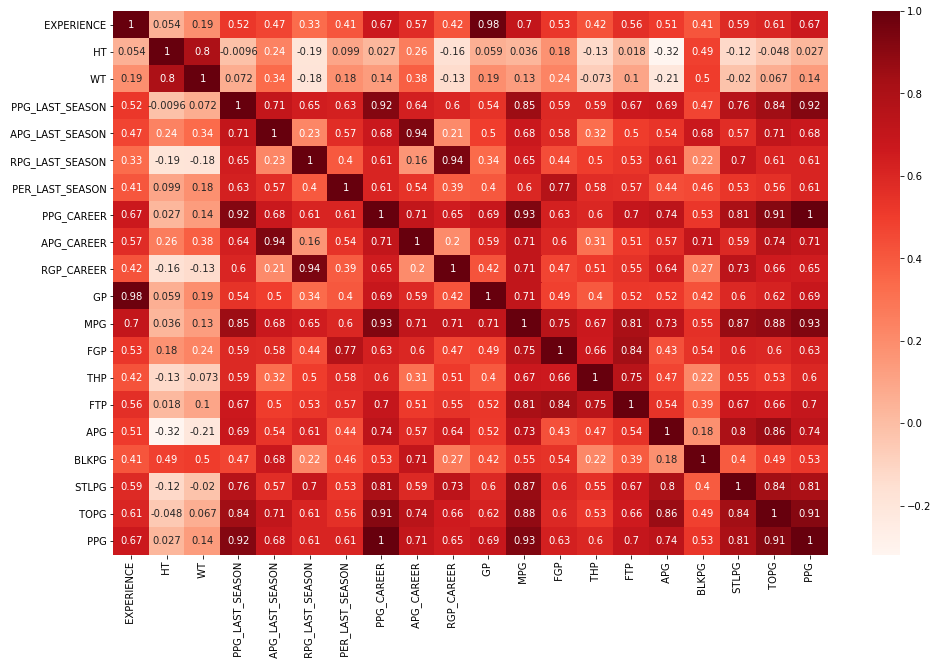

In [281]:
# Analisando todas as correlações
# Verifica-se que PPG tem correlação 1 em relação a PPG_CAREER, portanto, são colunas com dados repetidos
# PPG será desconsiderada

plt.figure(figsize=(16,10))
correlacao = df_nba.corr()
sb.heatmap(correlacao, annot=True, cmap=plt.cm.Reds)
plt.show()

**<h4>3.2 Tratando os dados</h4>**

<p>Nesta etapa faremos as ações de limpeza referente os problemas vistos acima.</p>
<br/>

<lu>
    <li>Colunas com espaços em branco: '_NAME', '_EXPERIENCE', '_URL' ...</lu>
    <li>Algumas colunas tem o tipo Object enquanto precisamos de um Int ou Float: 'AGE', 'THM_THA', 'FTM_FTA', 'FGM_FGA'</li>
    <li>Existem 12 linhas com valores nulos</li>
</lu>

In [282]:
# Criando uma cópia do DATAFRAME

df = df_nba.copy()

In [283]:
# Removendo espaços da descrição das colunas

df.columns = df_nba.columns.str.replace(' ', '')
df.columns

Index(['TEAM', 'NAME', 'EXPERIENCE', 'URL', 'POSITION', 'AGE', 'HT', 'WT',
       'COLLEGE', 'SALARY', 'PPG_LAST_SEASON', 'APG_LAST_SEASON',
       'RPG_LAST_SEASON', 'PER_LAST_SEASON', 'PPG_CAREER', 'APG_CAREER',
       'RGP_CAREER', 'GP', 'MPG', 'FGM_FGA', 'FGP', 'THM_THA', 'THP',
       'FTM_FTA', 'FTP', 'APG', 'BLKPG', 'STLPG', 'TOPG', 'PPG'],
      dtype='object')

In [284]:
# Excluindo colunas que não entrarão para o modelo
# Optou-se por não rotular TEAM, POSITION, que pode conter uma correlação com SALARY
# Contudo esta correlação será vista mais adiante

df.drop(columns=['THM_THA', 'FTM_FTA', 'FGM_FGA', 'URL', 'TEAM', 'PPG', 'COLLEGE'], inplace=True)
df.columns

Index(['NAME', 'EXPERIENCE', 'POSITION', 'AGE', 'HT', 'WT', 'SALARY',
       'PPG_LAST_SEASON', 'APG_LAST_SEASON', 'RPG_LAST_SEASON',
       'PER_LAST_SEASON', 'PPG_CAREER', 'APG_CAREER', 'RGP_CAREER', 'GP',
       'MPG', 'FGP', 'THP', 'FTP', 'APG', 'BLKPG', 'STLPG', 'TOPG'],
      dtype='object')

In [285]:
#  Encontrando jogadores com valores nulos

df_nulos = df.filter(['PPG_LAST_SEASON', 'APG_LAST_SEASON', 'RPG_LAST_SEASON', 'PER_LAST_SEASON']).isnull()
df_nulos = df_nulos[df_nulos.PPG_LAST_SEASON == True]
df_nulos

,PPG_LAST_SEASON,APG_LAST_SEASON,RPG_LAST_SEASON,PER_LAST_SEASON
50,True,True,True,True
257,True,True,True,True
276,True,True,True,True
309,True,True,True,True
332,True,True,True,True
335,True,True,True,True
347,True,True,True,True
448,True,True,True,True
473,True,True,True,True
482,True,True,True,True


In [286]:
# Extraindo os índices e verificando quem são os jogadores

indicesNulos = list(df_nulos.index)
df.loc[indicesNulos]

,NAME,EXPERIENCE,POSITION,AGE,HT,WT,SALARY,PPG_LAST_SEASON,APG_LAST_SEASON,RPG_LAST_SEASON,...,RGP_CAREER,GP,MPG,FGP,THP,FTP,APG,BLKPG,STLPG,TOPG
50,John Jenkins,5,SG,27,193.04,97.29,Not signed,NaN,NaN,NaN,...,1.5,145,12.8,0.448,0.364,0.849,0.8,0.1,0.2,0.6
257,CJ Wilcox,3,SG,27,195.58,88.24,Not signed,NaN,NaN,NaN,...,0.5,66,5.7,0.370,0.333,0.813,0.5,0.1,0.2,0.3
276,Christian Wood,2,PF,23,208.28,96.83,Not signed,NaN,NaN,NaN,...,0.4,30,8.4,0.447,0.250,0.667,0.2,0.4,0.3,0.3
309,Brandon Knight,6,PG,26,190.50,88.24,"14,631,250",NaN,NaN,NaN,...,3.3,382,31.3,0.415,0.357,0.812,4.3,0.2,0.9,2.7
332,DJ Stephens,1,SG,27,195.58,85.07,Not signed,NaN,NaN,NaN,...,1.7,3,5.0,0.429,0.000,1.000,0.0,0.0,0.0,0.0
335,Alexis Ajinca,7,C,30,218.44,112.22,"5,285,394",NaN,NaN,NaN,...,0.6,293,13.3,0.503,0.286,0.797,0.5,0.6,0.3,0.8
347,Darius Morris,4,PG,27,193.04,88.24,Not signed,NaN,NaN,NaN,...,1.0,132,11.1,0.384,0.322,0.630,1.4,0.0,0.3,0.8
448,Jordan McRae,2,SG,27,195.58,81.00,Not signed,NaN,NaN,NaN,...,1.0,59,9.8,0.404,0.384,0.774,0.7,0.1,0.2,0.5
473,Donald Sloan,5,PG,30,190.50,92.76,Not signed,NaN,NaN,NaN,...,2.1,218,17.2,0.409,0.310,0.754,3.0,0.0,0.4,1.1
482,Darius Johnson-Odom,2,SG,29,187.96,92.31,Not signed,NaN,NaN,NaN,...,0.9,7,3.0,0.000,0.000,0.000,0.3,0.0,0.1,0.3


In [287]:
# Excluindo jogadores com informações nulas e conferindo se há mais alguma

df.drop(indicesNulos, axis=0, inplace=True)
df.isnull().sum()

NAME               0
EXPERIENCE         0
POSITION           0
AGE                0
HT                 0
WT                 0
SALARY             0
PPG_LAST_SEASON    0
APG_LAST_SEASON    0
RPG_LAST_SEASON    0
PER_LAST_SEASON    0
PPG_CAREER         0
APG_CAREER         0
RGP_CAREER         0
GP                 0
MPG                0
FGP                0
THP                0
FTP                0
APG                0
BLKPG              0
STLPG              0
TOPG               0
dtype: int64

In [290]:
# Verificando quais jogadores não têm idade informada

df[df.AGE == '-']

,NAME,EXPERIENCE,POSITION,AGE,HT,WT,SALARY,PPG_LAST_SEASON,APG_LAST_SEASON,RPG_LAST_SEASON,...,RGP_CAREER,GP,MPG,FGP,THP,FTP,APG,BLKPG,STLPG,TOPG
44,Phillip Carr,0,F,-,205.74,92.76,Not signed,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,Tim Bond,0,G,-,198.12,76.92,Not signed,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [291]:
# Verificando quais jogadores não têm salário informado

df[df.SALARY == 'Not signed']

,NAME,EXPERIENCE,POSITION,AGE,HT,WT,SALARY,PPG_LAST_SEASON,APG_LAST_SEASON,RPG_LAST_SEASON,...,RGP_CAREER,GP,MPG,FGP,THP,FTP,APG,BLKPG,STLPG,TOPG
1,Justin Bibbs,0,G,22,195.58,99.55,Not signed,0.0,0.0,0.0,...,0.0,0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0
4,PJ Dozier,1,PG,21,198.12,92.76,Not signed,1.0,0.0,0.5,...,0.5,2,1.5,0.500,0.000,0.000,0.0,0.0,0.0,0.5
5,Marcus Georges-Hunt,2,SG,24,195.58,102.26,Not signed,1.4,0.2,0.4,...,0.5,47,5.8,0.418,0.294,0.710,0.2,0.0,0.1,0.1
9,Nick King,0,F,23,200.66,101.81,Not signed,0.0,0.0,0.0,...,0.0,0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0
10,Walt Lemon Jr.,1,PG,26,190.50,81.45,Not signed,3.4,1.0,0.4,...,0.4,5,7.0,0.438,1.000,0.667,1.0,0.2,0.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Isaiah Cousins,0,PG,24,193.04,86.43,Not signed,0.0,0.0,0.0,...,0.0,0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0
538,Isaac Haas,0,C,22,218.44,131.22,Not signed,0.0,0.0,0.0,...,0.0,0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0
540,Trey Lewis,0,PG,25,187.96,83.71,Not signed,0.0,0.0,0.0,...,0.0,0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0
541,Jairus Lyles,0,PG,23,187.96,79.19,Not signed,0.0,0.0,0.0,...,0.0,0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0


In [292]:
# Excluindo os jogadores sem salário informado garante também a exclusão dos que estão sem idade informada (102 atletas)
# Faremos isso abaixo e ficaremos com 436 linhas e 23 colunas no novo DATAFRAME tratado

indicesColunasSemInformacao = list(df[df.SALARY == 'Not signed'].index)
df.drop(indicesColunasSemInformacao, axis=0, inplace=True)
df.shape

(436, 23)

In [293]:
# Convertendo AGE e SALARY para float após retirar as linhas com valores do tipo object
# Convertendo também EXPERIENCE e GP que estavam como int64 para pradonizar os tipos numéricos para float64

df.SALARY = df.SALARY.str.replace(',', '').astype(float)
df.AGE = df.AGE.astype(float)

df.EXPERIENCE = df.EXPERIENCE.astype(float)
df.GP = df.GP.astype(float)

df.dtypes

NAME                object
EXPERIENCE         float64
POSITION            object
AGE                float64
HT                 float64
WT                 float64
SALARY             float64
PPG_LAST_SEASON    float64
APG_LAST_SEASON    float64
RPG_LAST_SEASON    float64
PER_LAST_SEASON    float64
PPG_CAREER         float64
APG_CAREER         float64
RGP_CAREER         float64
GP                 float64
MPG                float64
FGP                float64
THP                float64
FTP                float64
APG                float64
BLKPG              float64
STLPG              float64
TOPG               float64
dtype: object

**<h3>4. Correlações</h3>**

**<h4>4.1 Visualizando os dados em gráficos</h4>**

<p>Os gráficos a seguir fazem parte da fase de encontrar correlações. Como a variável TARGET  é a SALARY, vamos relacioná-la com todas as outras colunas. Será usado o SEABORN do python que nos fornece uma visualização prática e eficiente.</p>

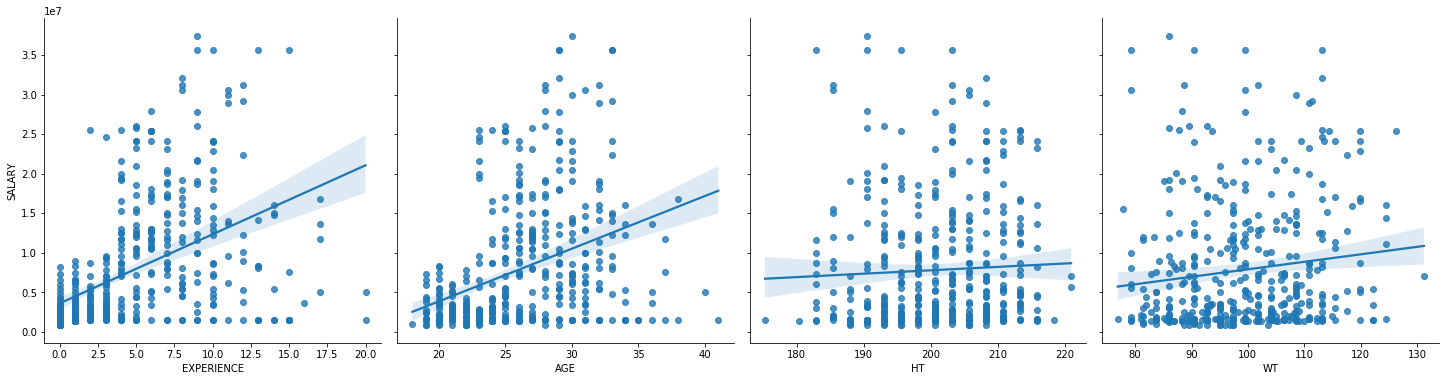

In [294]:
# Visualizando as correlações com SALARY

X = ['EXPERIENCE', 'AGE', 'HT', 'WT']
Y = ['SALARY']

sb.pairplot(df, x_vars=X, y_vars=Y, kind="reg", height=5)

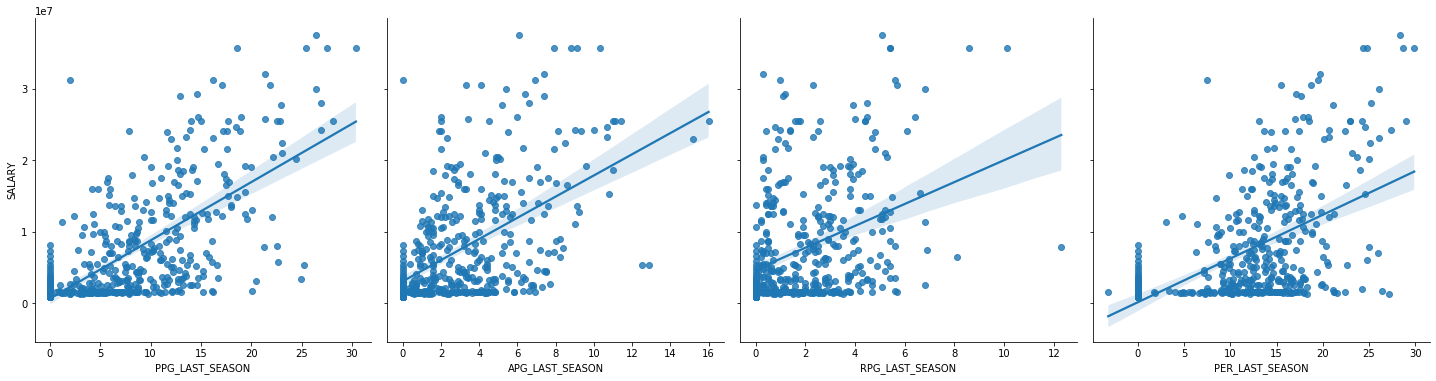

In [295]:
# Visualizando as correlações com SALARY

X = ['PPG_LAST_SEASON', 'APG_LAST_SEASON', 'RPG_LAST_SEASON', 'PER_LAST_SEASON']
Y = ['SALARY']

sb.pairplot(df, x_vars=X, y_vars=Y, kind="reg", height=5)

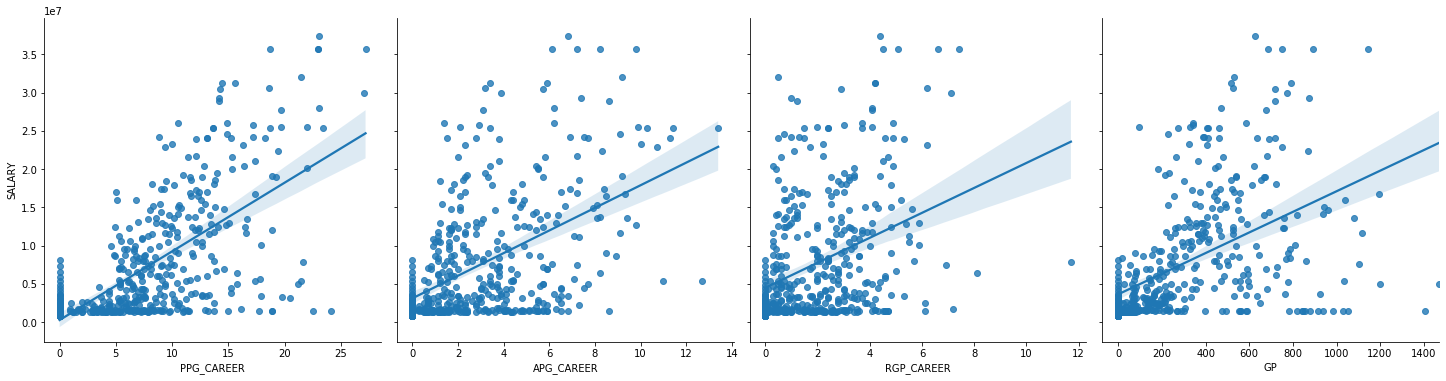

In [296]:
# Visualizando as correlações com SALARY

X = ['PPG_CAREER', 'APG_CAREER', 'RGP_CAREER', 'GP']
Y = ['SALARY']

sb.pairplot(df, x_vars=X, y_vars=Y, kind="reg", height=5)

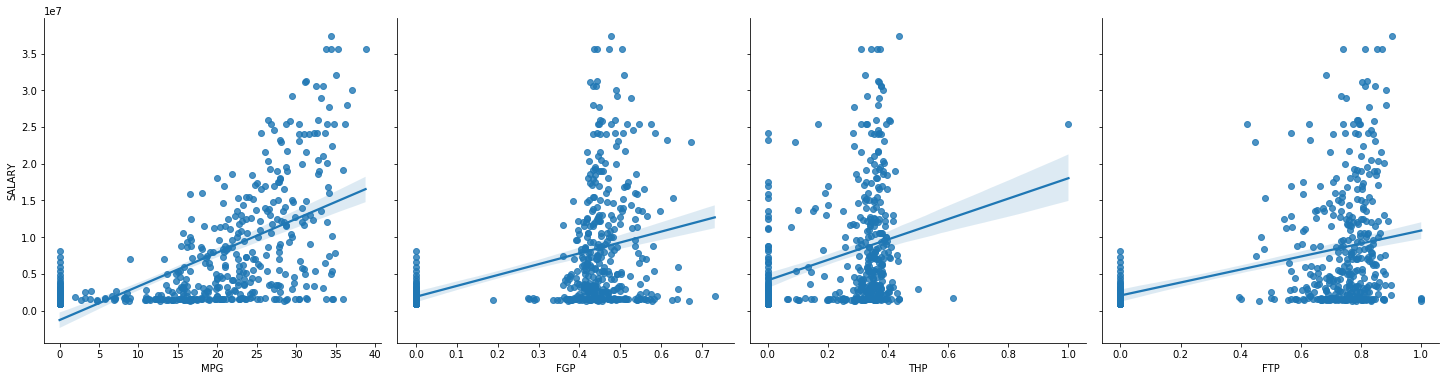

In [297]:
# Visualizando as correlações com SALARY

X = ['MPG', 'FGP', 'THP', 'FTP']
Y = ['SALARY']

sb.pairplot(df, x_vars=X, y_vars=Y, kind="reg", height=5)

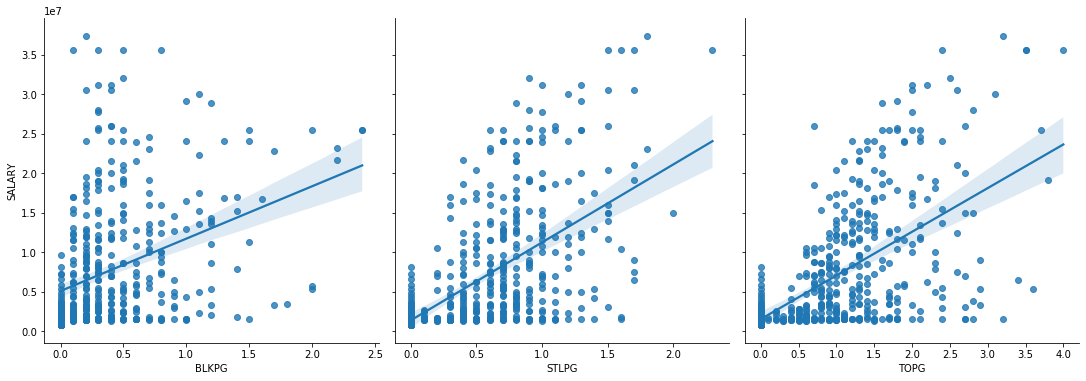

In [298]:
# Visualizando as correlações com SALARY

X = ['BLKPG', 'STLPG', 'TOPG']
Y = ['SALARY']

sb.pairplot(df, x_vars=X, y_vars=Y, kind="reg", height=5)

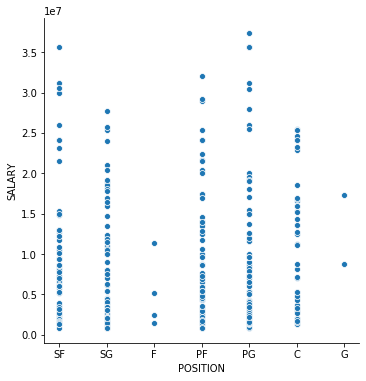

In [299]:
# Visualizando as correlações com SALARY
# Com exceção do F e G, as demais posições apresentam salários bem variados, limitando uma análise mais aprofundada

sb.pairplot(df, x_vars=['POSITION'], y_vars=['SALARY'], height=5)

**<h4>4.2 Analisando correlação em números (PEARSON)</h4>**

<p>Através da fórmula de PEARSON é possível descobrir o grau de correlação entre dois vetores de dados. Quanto mais próximo de 1 ou -1 maior a correlação. Para nossa análise, observa-se que a maior correlação atingiu 0.655 (PPG_LAST_SEASON), desconsideramos quando a análise é feita entre vetores de dados iguais.</p>

In [300]:
# Verificando as correlações através da fórmula de PEARSON

correlacoes = []
df_correlacao = df.drop(columns=['NAME','POSITION'])
for i in df_correlacao.columns:
    correlacoes.append((df_correlacao['SALARY'].corr(df_correlacao[i]), i))

correlacoes.sort(reverse=True)
correlacoes

[(0.9999999999999999, 'SALARY'),
 (0.655676397969779, 'PPG_LAST_SEASON'),
 (0.6372256737551588, 'PPG_CAREER'),
 (0.5849923238560933, 'MPG'),
 (0.5515693862593791, 'TOPG'),
 (0.5329677147941675, 'STLPG'),
 (0.5229449344237321, 'APG_LAST_SEASON'),
 (0.5047945352497611, 'PER_LAST_SEASON'),
 (0.4958263491929498, 'APG_CAREER'),
 (0.49027986931276785, 'GP'),
 (0.463271151100996, 'APG'),
 (0.45959857080706235, 'EXPERIENCE'),
 (0.3660154087928164, 'AGE'),
 (0.36047370428740527, 'RPG_LAST_SEASON'),
 (0.3562143720211878, 'RGP_CAREER'),
 (0.3523585623035294, 'BLKPG'),
 (0.2967581310929169, 'FGP'),
 (0.2931791234233112, 'FTP'),
 (0.2625040860060568, 'THP'),
 (0.12767084347920352, 'WT'),
 (0.04574213043579767, 'HT')]

**<h3>5. Modelo de Machine Learning</h3>**

**<h4>5.1 Criando modelos</h4>**

<p>O modelo será baseado em regressão linear. Os dados serão divididos em teste e treinamento, em seguida será analisado o erro do modelo.</p>

In [301]:
# Primeiro modelo: utilizaremos as 3 colunas com maior correlação

modelo = linear_model.LinearRegression()

# Target
y = df['SALARY']

# Colunas com maiores correlações
x = df[['PPG_LAST_SEASON', 'PPG_CAREER', 'MPG']]

# Dividindo os dados em 70% treino e 30% teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, random_state=42)

# Treinando o modelo
modelo.fit(x_treino, y_treino)

# Aplicando a base de teste
previsao = modelo.predict(x_teste)

# Verificando erro
r2_score(y_teste,previsao)

0.49100586670558277

In [302]:
# Segundo modelo: utilizaremos as 2 colunas com maior correlação e as 2 com menor

modelo = linear_model.LinearRegression()

# Target
y = df['SALARY']

# Colunas com maiores e menores correlações
x = df[['PPG_LAST_SEASON', 'PPG_CAREER', 'WT', 'HT']]

# Dividindo os dados em 70% treino e 30% teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, random_state=42)

# Treinando o modelo
modelo.fit(x_treino, y_treino)

# Aplicando a base de teste
previsao = modelo.predict(x_teste)

# Verificando erro
r2_score(y_teste,previsao)

0.5164612334369536

In [303]:
# Terceiro modelo: utilizaremos todas as colunas

modelo = linear_model.LinearRegression()

# Target
y = df['SALARY']

# Todas as colunas númericas
x = df[['EXPERIENCE', 'AGE', 'HT', 'WT', 'PPG_LAST_SEASON', 
       'APG_LAST_SEASON', 'RPG_LAST_SEASON', 'PER_LAST_SEASON', 'PPG_CAREER', 'APG_CAREER', 
       'RGP_CAREER', 'GP','MPG', 'FGP', 'THP', 'FTP', 'APG', 'BLKPG', 'STLPG', 'TOPG']]

# Dividindo os dados em 70% treino e 30% teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, random_state=42)

# Treinando o modelo
modelo.fit(x_treino, y_treino)

# Aplicando a base de teste
previsao = modelo.predict(x_teste)

# Verificando erro
r2_score(y_teste,previsao)

0.4981273218942057

In [304]:
# Quarto modelo: 5 colunas com maior correlação

modelo = linear_model.LinearRegression()

# Target
y = df['SALARY']

# 5 colunas númericas com maior correlação
x = df[['PPG_LAST_SEASON', 'PPG_CAREER', 'MPG', 'TOPG', 'STLPG']]

# Dividindo os dados em 70% treino e 30% teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, random_state=42)

# Treinando o modelo
modelo.fit(x_treino, y_treino)

# Aplicando a base de teste
previsao = modelo.predict(x_teste)

# Verificando erro
r2_score(y_teste,previsao)

0.5062617294839165

**<h4>5.2 Escolhendo o modelo</h4>**

<p>Apesar de ser um erro ainda muito alto, o primeiro modelo apresentou um erro de 0.491, o menor dentre os analisados. Aplicaremos um caso prático a ele e tentaremos deduzir se o salário de um jogador é compatível ao que o modelo prever para ele.</p>

In [305]:
# Primeiro modelo: utilizaremos as 3 colunas com maior correlação

modelo = linear_model.LinearRegression()

# Target
y = df['SALARY']

# Colunas com maiores correlações
x = df[['PPG_LAST_SEASON', 'PPG_CAREER', 'MPG']]

# Dividindo os dados em 70% treino e 30% teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, random_state=42)

# Treinando o modelo
modelo.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [306]:
# Pegando informações de Stephen Curry para prever seu salário

stephen = df[df.NAME == 'Stephen Curry']
stephen = stephen.loc[:,['PPG_LAST_SEASON', 'PPG_CAREER', 'MPG']]
stephen

,PPG_LAST_SEASON,PPG_CAREER,MPG
103,26.4,23.1,34.4


In [307]:
# Prevendo salário

previsao = round(modelo.predict(stephen)[0],0)
previsao

20789870.0

In [308]:
# Pegando salário Real

salario = df[df.NAME == 'Stephen Curry'].SALARY
salario

103    37457154.0
Name: SALARY, dtype: float64

In [309]:
# Erro de $ 16.667.284

ERRO = previsao - salario
ERRO

103   -16667284.0
Name: SALARY, dtype: float64

In [310]:
# A previsão foi 44% menor do que o real

ErroPercente = round(ERRO / salario * 100,0)
ErroPercente

103   -44.0
Name: SALARY, dtype: float64

**<h3>6. Conclusão</h3>**

<p>O modelo ainda não apresenta números precisos em suas previsões. Contudo, com esta análise é possível deduzir que Stephen Curry recebe um valor acima do que seria ideal. Por fim, é preciso continuar o trabalho no modelo, aplicando um treinamento maior, analisando outras correlações, como a posição e o time que joga, por exemplo, até atingir um erro menor. Sendo possível ter informações mais precisas</p>